In [100]:
import numpy as np
from scipy import stats

import math
import matplotlib.pyplot as plt

In [95]:
# nos hace numeros aleatorios en un array
stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size=4)

array([-0.25272737,  0.30432186, -0.33291371,  0.86901643])

In [109]:
class Capa:
    def __init__(self, n_neuronas_capa_anterior, n_neuronas, fun_act):
        self.fun_act = fun_act
        self.b = np.round(stats.truncnorm.rvs(-1, 1, loc=0,
                          scale=1, size=n_neuronas).reshape(1, n_neuronas), 3)
        self.W = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size=n_neuronas *
                          n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior, n_neuronas), 3)


class Red:
    def __init__(self):
        self.capas = []

    def agregar_capa(self, n_neuronas_capa_anterior, n_neuronas, fun_act):
        capa = Capa(n_neuronas_capa_anterior, n_neuronas, fun_act)
        self.capas.append(capa)

    def forward(self, X):
        a = X
        for capa in self.capas:
            z = np.dot(a, capa.W) + capa.b
            a = capa.fun_act(z)
        return a

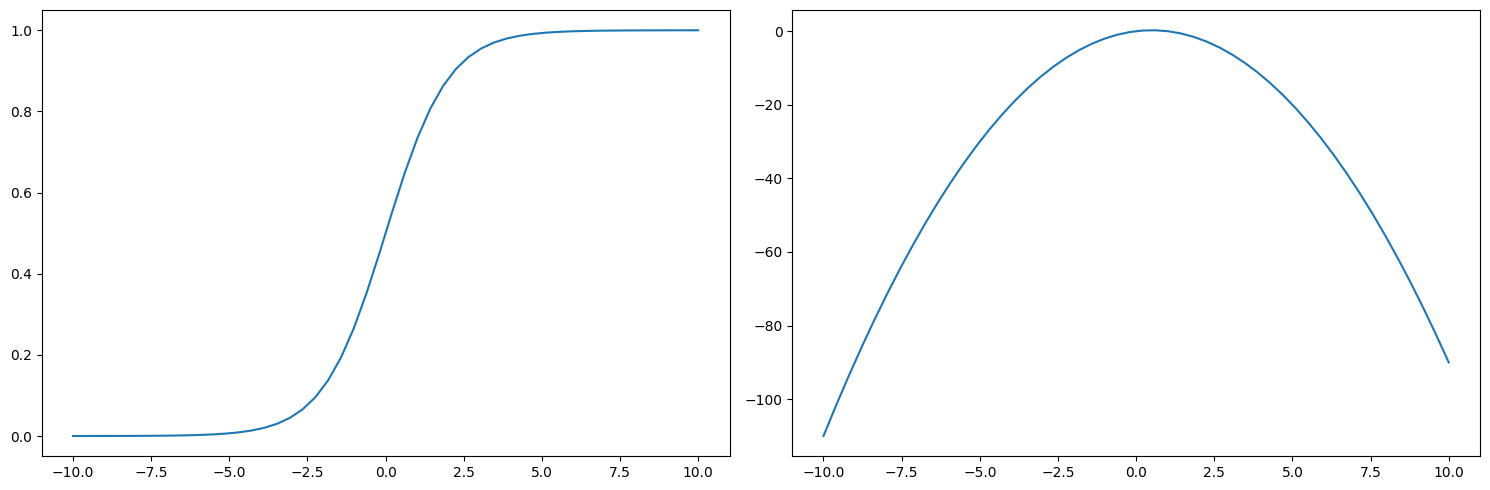

In [101]:
sigmoid = (
    lambda x: 1 / (1 + np.exp(-x)),
    lambda x: x * (1 - x)
)

rango = np.linspace(-10, 10).reshape([50, 1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

# Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

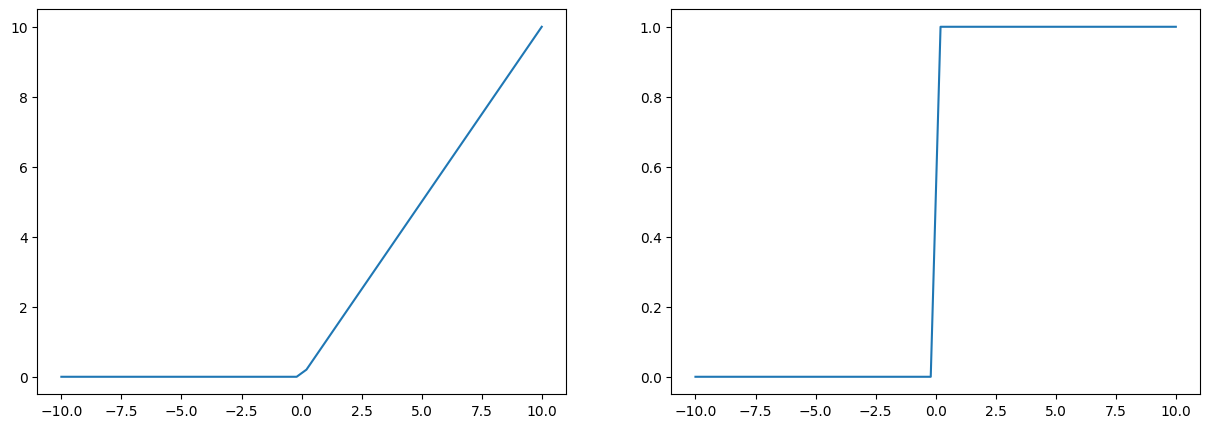

In [104]:
def derivada_relu(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


relu = (
    lambda x: x * (x > 0),
    lambda x: derivada_relu(x)
)

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10, 10).reshape([50, 1])

# Cremos los graficos

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].plot(rango, datos_relu[:, 0])
axes[1].plot(rango, datos_relu_derivada[:, 0])
plt.show()

In [105]:

neuronas = [4, 8, 4, 1]

funs_act = [relu, relu, sigmoid]

red = []

for i in range(len(neuronas)-1):
    x = capa(neuronas[i], neuronas[i+1], funs_act[i])
    red.append(x)

print(red)

[<__main__.capa object at 0x0000028882B773D0>, <__main__.capa object at 0x0000028880460E20>, <__main__.capa object at 0x0000028880460E50>]


In [115]:
red = Red()

red.agregar_capa(2, 8, relu)
red.agregar_capa(8, 6, relu)
red.agregar_capa(6, 4, relu)
red.agregar_capa(4, 1, sigmoid)

# Vamos a entrenarlo con make circles:


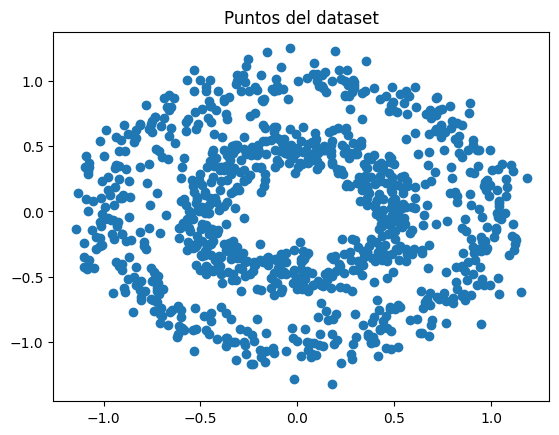

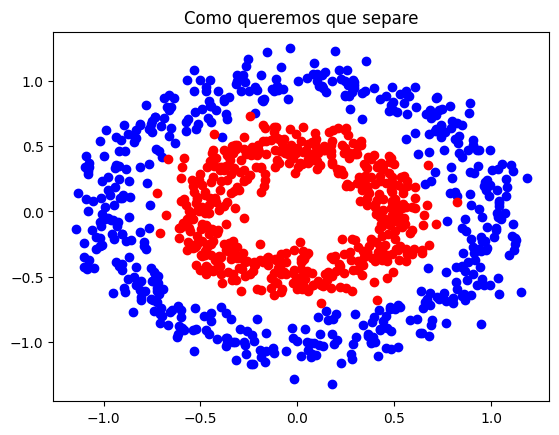

In [116]:
from sklearn.datasets import make_circles

# Creamos los datos
n = 1000
entry_params = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.1)

Y = Y[:, np.newaxis]

plt.scatter(X[:, 0], X[:, 1])
plt.title("Puntos del dataset")
plt.show()

# Queremos separar los dos circulos así:
plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c='b')
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c='r')
plt.title("Como queremos que separe")
plt.show()

In [121]:

red.forward(X)

TypeError: 'tuple' object is not callable